In [217]:

import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
from mpl_toolkits import mplot3d
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from scipy.stats import multivariate_normal
np.random.seed(41)


In [218]:
%run /Users/abrahamholtermann/fluct/Integrated/Quantitites.ipynb

<ipython-input-218-c67a3a92094b>:6: RuntimeWarning: invalid value encountered in double_scalars
  v4 =  (2*np.mean(a*a)**2 - np.mean(a*a*a*a))**(1/4)
<ipython-input-218-c67a3a92094b>:7: RuntimeWarning: invalid value encountered in double_scalars
  v4p = (2*np.mean(a*b)*np.mean(a*a) - np.mean(a*a*a*b))/((2*np.mean(a*a)**2 - np.mean(a*a*a*a))**(3/4))


In [219]:
data = np.zeros(shape=(7,20))
err = np.zeros(shape=(7,20))

sigma1 = np.zeros(shape=(7,20))
sigma1err = np.zeros(shape=(7,20))
sigma2 = np.zeros(shape=(7,20))
sigma2err = np.zeros(shape=(7,20))
sigma3 = np.zeros(shape=(7,20))
sigma3err = np.zeros(shape=(7,20))
v_2= np.zeros(shape=(7,20))
v_4 = np.zeros(shape=(7,20))

orth = np.zeros(shape=(7,20))



for i in range(7):
    
    var_v = (0.55 * 0.1)**2
    var_vp = ((0.55 * 0.05) * ((i)/5))**2
    print(i)
    
    for j in range(20):
        cov = np.sqrt(var_v)*np.sqrt(var_vp)*((j-10)/10)
        
        #print(cov)
        d,e,s1,s1e,s2,s2e,s3,s3e,v2,v4 =  subsamplerun("Ratio4_uw",1000,100,var_v,var_vp,cov,0.1,0.05)
        
        
        
        
        print(var_v, var_vp, cov)
        data[i][j] = d
        err[i][j] = e
        sigma1[i][j] = s1
        sigma1err[i][j] = s1e
        sigma2[i][j] = s2
        sigma2err[i][j] = s2e
        sigma3[i][j] = s3
        sigma3err[i][j] = s3e
        v_2[i][j] = v2
        v_4[i][j] = v4
        
        #covar[j] = cov + 0.1*0.05
        orth[i][j] = (cov + 0.1*0.05)/(np.sqrt((var_v+ 0.1**2)*(var_vp+ 0.05**2)))
        #orth[i][j] = (cov+0.1*0.05)
    
    
    

<ipython-input-218-c67a3a92094b>:6: RuntimeWarning: invalid value encountered in double_scalars
  v4 =  (2*np.mean(a*a)**2 - np.mean(a*a*a*a))**(1/4)
<ipython-input-218-c67a3a92094b>:7: RuntimeWarning: invalid value encountered in double_scalars
  v4p = (2*np.mean(a*b)*np.mean(a*a) - np.mean(a*a*a*b))/((2*np.mean(a*a)**2 - np.mean(a*a*a*a))**(3/4))


0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 -0.0
0.0030250000000000008 0.0 0.0
0.0030250000000000008 0.0 0.0
0.0030250000000000008 0.0 0.0
0.0030250000000000008 0.0 0.0
0.0030250000000000008 0.0 0.0
0.0030250000000000008 0.0 0.0
0.0030250000000000008 0.0 0.0
0.0030250000000000008 0.0 0.0
0.0030250000000000008 0.0 0.0
0.0030250000000000008 0.0 0.0
1


<ipython-input-218-8b5d03afd718>:19: RuntimeWarning: invalid value encountered in sqrt
  c = np.dot(evecs, np.diag(np.sqrt(evals)))


0.0030250000000000008 3.0250000000000017e-05 -0.00030250000000000014
0.0030250000000000008 3.0250000000000017e-05 -0.00027225000000000014
0.0030250000000000008 3.0250000000000017e-05 -0.00024200000000000014
0.0030250000000000008 3.0250000000000017e-05 -0.00021175000000000008
0.0030250000000000008 3.0250000000000017e-05 -0.00018150000000000007
0.0030250000000000008 3.0250000000000017e-05 -0.00015125000000000007
0.0030250000000000008 3.0250000000000017e-05 -0.00012100000000000007
0.0030250000000000008 3.0250000000000017e-05 -9.075000000000004e-05
0.0030250000000000008 3.0250000000000017e-05 -6.0500000000000034e-05
0.0030250000000000008 3.0250000000000017e-05 -3.0250000000000017e-05
0.0030250000000000008 3.0250000000000017e-05 0.0
0.0030250000000000008 3.0250000000000017e-05 3.0250000000000017e-05
0.0030250000000000008 3.0250000000000017e-05 6.0500000000000034e-05
0.0030250000000000008 3.0250000000000017e-05 9.075000000000004e-05
0.0030250000000000008 3.0250000000000017e-05 0.000121000000

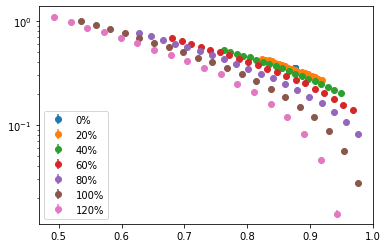

In [216]:
plt.errorbar(orth[0],data[0],yerr = err[0],fmt = "o",label = "0%")
plt.errorbar(orth[1],data[1],yerr = err[1],fmt = "o",label = "20%")
plt.errorbar(orth[2],data[2],yerr = err[2],fmt = "o",label = "40%")
plt.errorbar(orth[3],data[3],yerr = err[3],fmt = "o",label = "60%")
plt.errorbar(orth[4],data[4],yerr = err[4],fmt = "o",label = "80%")
plt.errorbar(orth[5],data[5],yerr = err[5],fmt = "o",label = "100%")
plt.errorbar(orth[6],data[6],yerr = err[6],fmt = "o",label = "120%")
#plt.xlim(0.00,1)
#plt.ylim(-0.2,1)
plt.yscale("log")


plt.legend()

<ErrorbarContainer object of 3 artists>

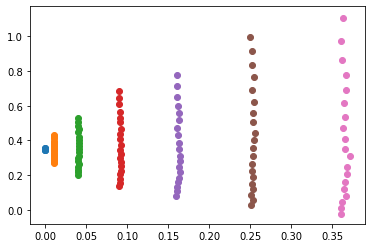

In [206]:
plt.errorbar(sigma1[0],data[0],yerr = err[0],fmt = "o",label = "0%")
plt.errorbar(sigma1[1],data[1],yerr = err[1],fmt = "o",label = "0%")
plt.errorbar(sigma1[2],data[2],yerr = err[2],fmt = "o",label = "0%")
plt.errorbar(sigma1[3],data[3],yerr = err[3],fmt = "o",label = "0%")
plt.errorbar(sigma1[4],data[4],yerr = err[4],fmt = "o",label = "0%")
plt.errorbar(sigma1[5],data[5],yerr = err[5],fmt = "o",label = "0%")
plt.errorbar(sigma1[6],data[6],yerr = err[6],fmt = "o",label = "0%")

#plt.xlim(-0.0001,0.0032)
#plt.ylim(0.6,1.2)

<ErrorbarContainer object of 3 artists>

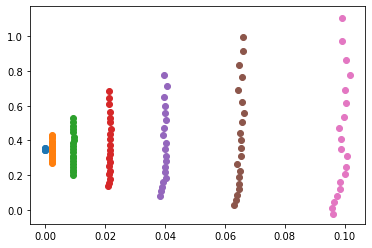

In [207]:
plt.errorbar(sigma2[0],data[0],yerr = err[0],fmt = "o",label = "0%")
plt.errorbar(sigma2[1],data[1],yerr = err[1],fmt = "o",label = "0%")
plt.errorbar(sigma2[2],data[2],yerr = err[2],fmt = "o",label = "0%")
plt.errorbar(sigma2[3],data[3],yerr = err[3],fmt = "o",label = "0%")
plt.errorbar(sigma2[4],data[4],yerr = err[4],fmt = "o",label = "0%")
plt.errorbar(sigma2[5],data[5],yerr = err[5],fmt = "o",label = "0%")
plt.errorbar(sigma2[6],data[6],yerr = err[6],fmt = "o",label = "0%")

#plt.xlim(0.00005,0.0002)
#plt.ylim(0.6,1.2)

<ErrorbarContainer object of 3 artists>

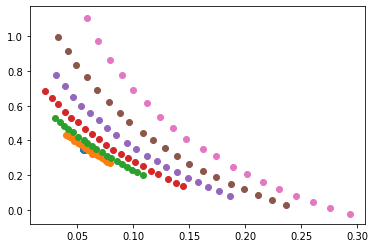

In [208]:
plt.errorbar(sigma3[0],data[0],yerr = err[0],fmt = "o",label = "0%")
plt.errorbar(sigma3[1],data[1],yerr = err[1],fmt = "o",label = "0%")
plt.errorbar(sigma3[2],data[2],yerr = err[2],fmt = "o",label = "0%")
plt.errorbar(sigma3[3],data[3],yerr = err[3],fmt = "o",label = "0%")
plt.errorbar(sigma3[4],data[4],yerr = err[4],fmt = "o",label = "0%")
plt.errorbar(sigma3[5],data[5],yerr = err[5],fmt = "o",label = "0%")
plt.errorbar(sigma3[6],data[6],yerr = err[6],fmt = "o",label = "0%")

#plt.xlim(-.000001,.000001)
#plt.ylim(0,1.5)

<ErrorbarContainer object of 3 artists>

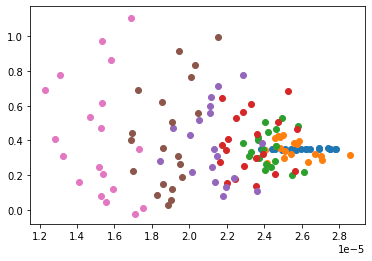

In [209]:
plt.errorbar(v_2[0],data[0],yerr = err[0],fmt = "o",label = "0%")
plt.errorbar(v_2[1],data[1],yerr = err[1],fmt = "o",label = "0%")
plt.errorbar(v_2[2],data[2],yerr = err[2],fmt = "o",label = "0%")
plt.errorbar(v_2[3],data[3],yerr = err[3],fmt = "o",label = "0%")
plt.errorbar(v_2[4],data[4],yerr = err[4],fmt = "o",label = "0%")
plt.errorbar(v_2[5],data[5],yerr = err[5],fmt = "o",label = "0%")
plt.errorbar(v_2[6],data[6],yerr = err[6],fmt = "o",label = "0%")


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]])

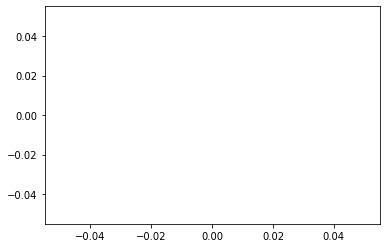

In [210]:
plt.errorbar(v_4[0],data[0],yerr = err[0],fmt = "o",label = "0%")
plt.errorbar(v_4[1],data[1],yerr = err[1],fmt = "o",label = "0%")
plt.errorbar(v_4[2],data[2],yerr = err[2],fmt = "o",label = "0%")
plt.errorbar(v_4[3],data[3],yerr = err[3],fmt = "o",label = "0%")
plt.errorbar(v_4[4],data[4],yerr = err[4],fmt = "o",label = "0%")
plt.errorbar(v_4[5],data[5],yerr = err[5],fmt = "o",label = "0%")
plt.errorbar(v_4[6],data[6],yerr = err[6],fmt = "o",label = "0%")

v_4